<a href="https://colab.research.google.com/github/deepshikhachadokar/creditcard-fraud-detection/blob/main/cradit_card_froud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Credit Card Fraud Detection using Machine learning**

**Problem statement:-** The aim of the project is to predict fraudulent credit card transactions using machine learning models. This is crucial from the bank’s as well as customer’s perspective. The banks cannot afford to lose their customers’ money to fraudsters. Every fraud is a loss to the bank as the bank is responsible for the fraud transactions.

**Importing the libraries**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier

from mlxtend.plotting import plot_learning_curves
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, matthews_corrcoef

import warnings
warnings.filterwarnings("ignore")

In [ ]:

# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
credit_card_data=pd.read_csv("/content/drive/My Drive/creditcard.csv")

In [ ]:
# getting a quick overview of data ,through first five rows
credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
# getting information of data
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
# checking for null values
credit_card_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

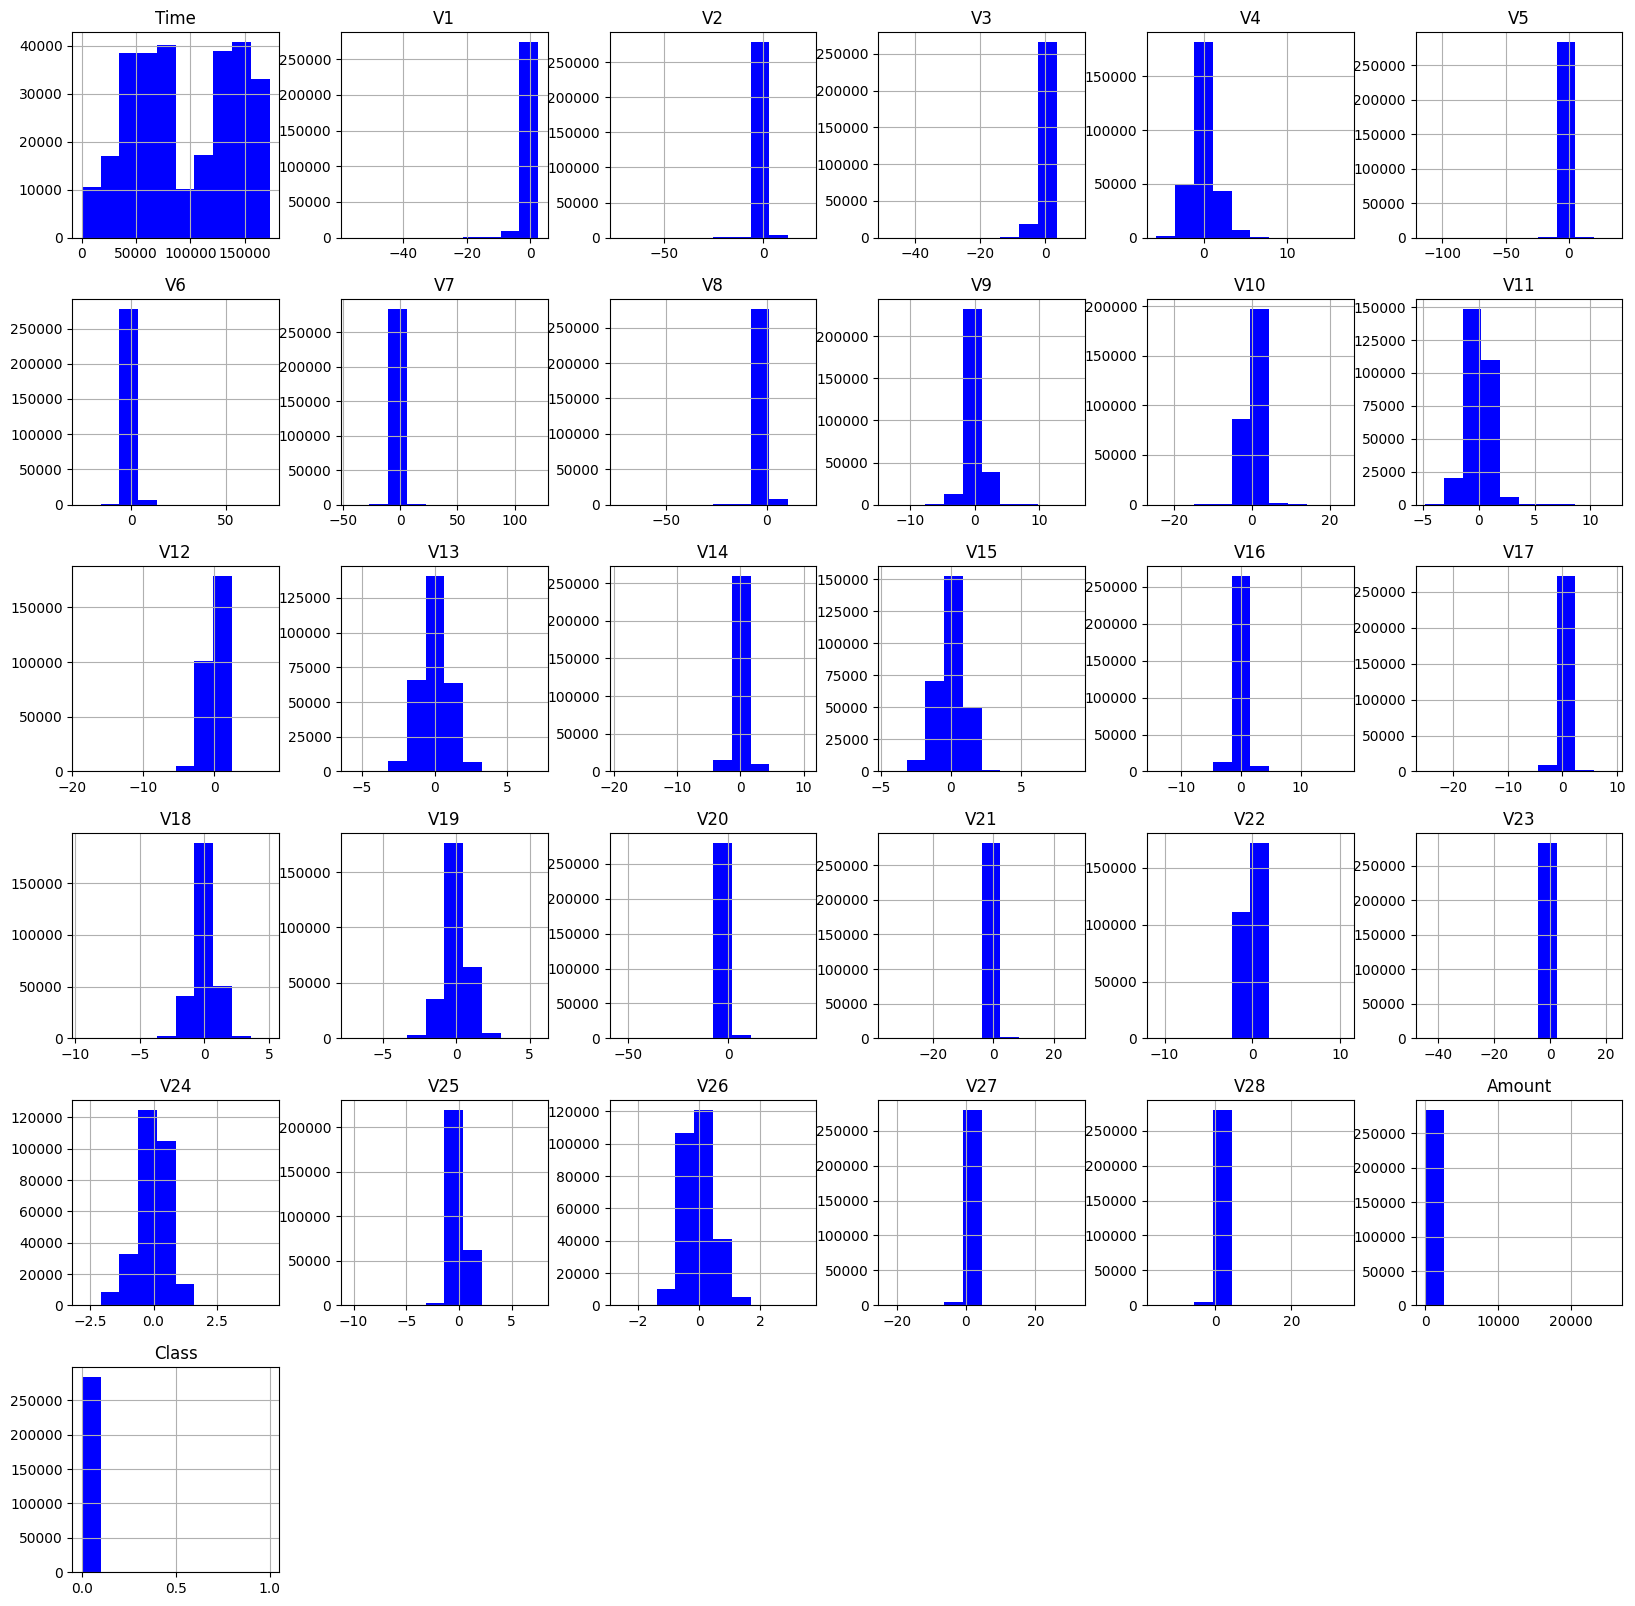

In [ ]:
credit_card_data.hist(figsize=(20,20),color='blue')
plt.show()

In [ ]:
# lets make these data relevent for analysis
# sepreating the data for normal and fraud trasaction.
normal_trans= credit_card_data[credit_card_data .Class == 0]
fraud_trans=credit_card_data[credit_card_data.Class ==1]

In [ ]:
# print the normal transaction
print(normal_trans)
print(normal_trans.shape)

            Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
0       0.462388  0.239599  0.098698  0.363787  ... -0.01830

In [ ]:
print(fraud_trans)
print(fraud_trans.shape)

            Time        V1        V2        V3        V4        V5        V6  \
541        406.0 -2.312227  1.951992 -1.609851  3.997906 -0.522188 -1.426545   
623        472.0 -3.043541 -3.157307  1.088463  2.288644  1.359805 -1.064823   
4920      4462.0 -2.303350  1.759247 -0.359745  2.330243 -0.821628 -0.075788   
6108      6986.0 -4.397974  1.358367 -2.592844  2.679787 -1.128131 -1.706536   
6329      7519.0  1.234235  3.019740 -4.304597  4.732795  3.624201 -1.357746   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8        V9  .

In [ ]:
# using statistical measure for description
normal_trans.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [ ]:
# description for fraud transaction
fraud_trans.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [ ]:
# let compare the transaction for  mean
credit_card_data.groupby('Class').mean()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [ ]:
def countplot_data(data, feature):
    '''
        Method to compute countplot of given dataframe
        Parameters:
            data(pd.Dataframe): Input Dataframe
            feature(str): Feature in Dataframe
    '''
    plt.figure(figsize=(10,10))
    sns.countplot(x=feature, data=data)
    plt.show()

def pairplot_data_grid(data, feature1, feature2, target):
    '''
        Method to construct pairplot of the given feature wrt data
        Parameters:
            data(pd.DataFrame): Input Dataframe
            feature1(str): First Feature for Pair Plot
            feature2(str): Second Feature for Pair Plot
            target: Target or Label (y)
    '''

    sns.facetGrid(data, hue=target, size=6).map(plt.scatter, feature1, feature2).add_legend()
    plt.show()


Pie Chart:


Text(0, 0.5, '')

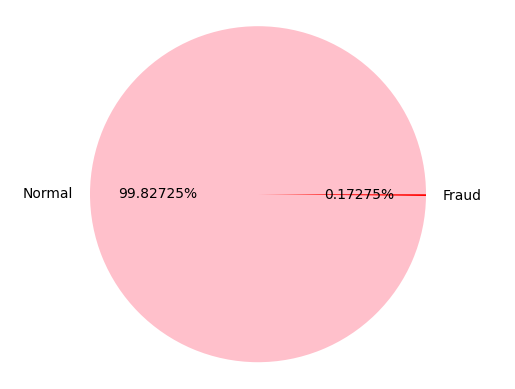

In [ ]:
# Check Class variables that has 0 value for Genuine transactions and 1 for Fraud

print("Pie Chart:")
fig, ax = plt.subplots(1, 1)
ax.pie(credit_card_data.Class.value_counts(),autopct='%1.5f%%', labels=['Normal','Fraud'], colors=['pink','r'])
plt.axis('equal')
plt.ylabel('')


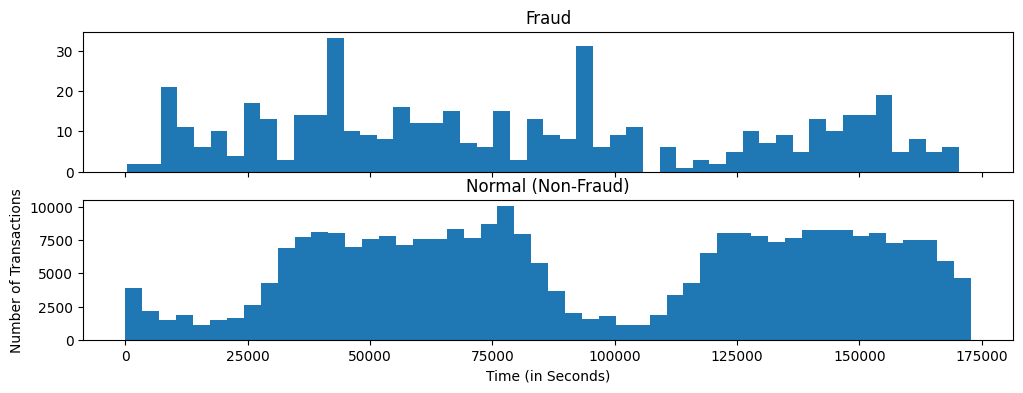

In [ ]:
# now checking Time value in case of Fraud and Normal Transaction compared according to Number of transactions.

fig, (axis_1, axis_2) = plt.subplots(2, 1, sharex=True, figsize=(12,4))
bins = 50

axis_1.hist(credit_card_data.Time[credit_card_data.Class == 1], bins = bins)
axis_1.set_title('Fraud')

axis_2.hist(credit_card_data.Time[credit_card_data.Class == 0], bins = bins)
axis_2.set_title('Normal (Non-Fraud)')

plt.xlabel('Time (in Seconds)')
plt.ylabel('Number of Transactions')
plt.show()

# We can see that in both cases , feature time looks similar. but if we look carefully, we can see that Normal
# transactions are kind of uniformly distributed whereas the shape of Fraud transaction is not

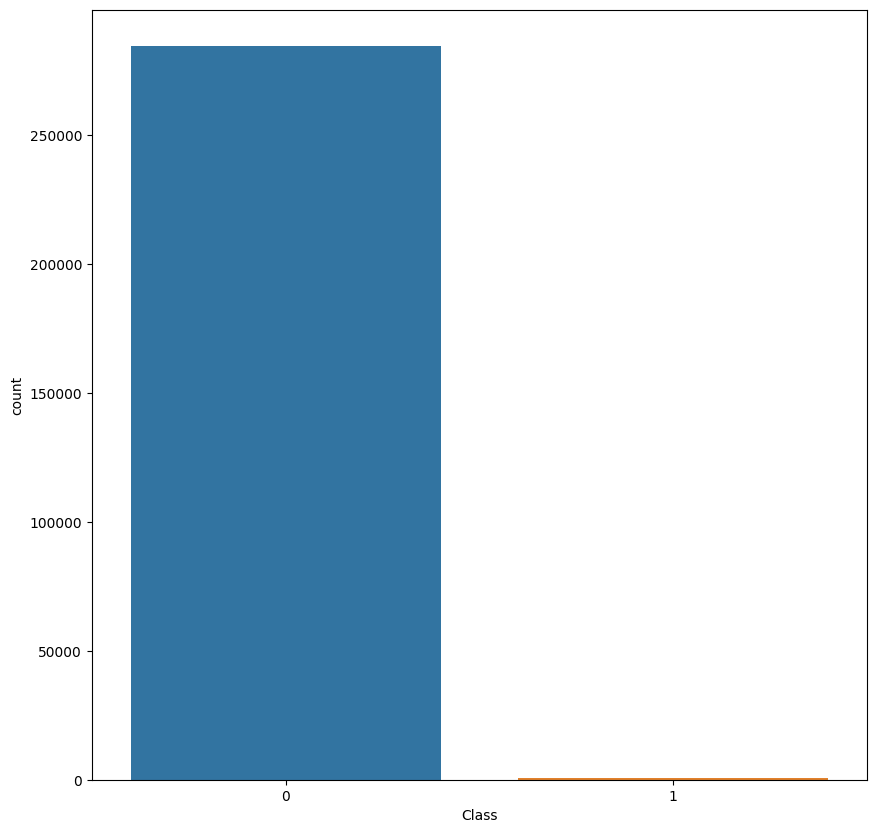

In [ ]:
countplot_data(credit_card_data, credit_card_data.Class)

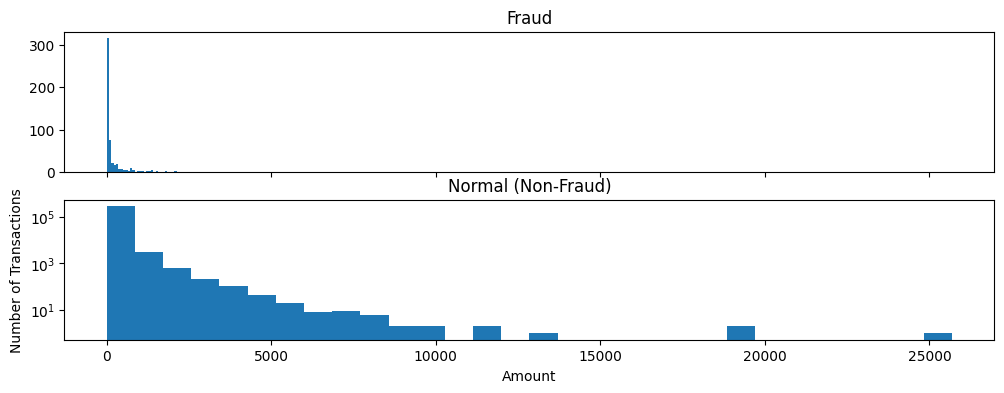

In [ ]:
# now checking Amount in case of Fraud and Normal Transaction compared according to Number of transactions.

fig, (axis_1, axis_2) = plt.subplots(2, 1, sharex=True, figsize=(12,4))

bins = 30

axis_1.hist(credit_card_data.Amount[credit_card_data.Class == 1], bins = bins)
axis_1.set_title('Fraud')

axis_2.hist(credit_card_data.Amount[credit_card_data.Class == 0], bins = bins)
axis_2.set_title('Normal (Non-Fraud)')

plt.xlabel('Amount')
plt.ylabel('Number of Transactions')
plt.yscale("log")
plt.show()

# we can see here that fraud transactions are of smaller amount. but this cant be used solely because normal transactions
# too have a lot of transactions of smaller amount. so this kind of helps in a sense that we can say that if the amount
# is not large then its 'probably' not a fraud transaction, but obviously, fraud and normal transactions cant be
# distinguished only according to amount.

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64


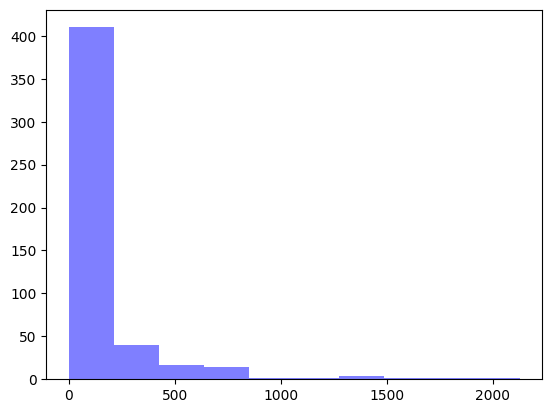

In [ ]:
# Fraud data looks interesting , lets look into it a bit more
# lets see the transaction amount in case Fraud at a smaller scale.

print(credit_card_data.Amount[credit_card_data.Class == 1 ].describe())
plt.hist(credit_card_data.Amount[credit_card_data.Class == 1 ], 10,  facecolor='blue', alpha=0.5)
plt.show()

In [ ]:
#using sampling to balance the dataset,ie random under sampling which decreses the normal transaction data
# normal_transaction = fraud_transaction
normal_trans_sample=normal_trans.sample(n=492)


In [ ]:
# creating a new dataframe by joining two dataframes
df_new=pd.concat([normal_trans_sample,fraud_trans])
df_new.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
152704,97443.0,1.950266,-0.465956,0.135391,0.366908,-0.766682,0.085231,-1.062200,0.096738,2.395247,...,-0.084070,0.130320,0.262984,-0.432577,-0.592699,0.446018,-0.042449,-0.056689,14.95,0
268758,163366.0,-0.236906,0.013934,1.447793,-0.732557,-0.593043,0.254768,-0.089339,0.101761,1.424800,...,0.087571,0.680156,0.035550,0.764534,-0.351919,0.556107,0.169768,-0.173024,80.00,0
144077,85848.0,-9.860478,-10.364674,-1.340676,1.340124,6.376697,-6.729542,-5.256264,0.882129,1.672086,...,-0.017799,-0.515105,-3.980694,0.988290,-1.043633,-0.891814,2.357989,-2.882242,1.00,0
99396,67099.0,1.193551,0.170795,0.139400,0.460407,-0.061575,-0.115648,-0.174147,0.163748,-0.046620,...,-0.242466,-0.750783,0.119061,-0.377645,0.121061,0.130661,-0.017726,0.011521,1.29,0
214003,139489.0,-0.746279,1.307767,-0.932529,-1.301177,1.788325,-0.443439,1.823891,-0.606416,-0.312157,...,0.106599,0.640867,-0.572022,-1.317499,0.496131,0.302865,-0.167676,0.073379,20.00,0


In [ ]:
df_new.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
281674,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


In [ ]:
#  now counting the values of new data frame
df_new['Class'].value_counts()

0    492
1    492
Name: Class, dtype: int64

Now, we will produce a sub-sample from the previous dataset which will contain randomly 492 valid transactions and 492 fraud transactions. We must do this because in the beginning of this notebook we saw that the original dataframe was heavily imbalanced. By doing this we help our algorithms better understand patterns that determines whether a transaction is a fraud or not which is our target.

In [ ]:
# Our new dataset which contains 984 transactions in random order (492 valid and 492 fraud)
# 492 + 492 = 984, so the shape of the new_df is correct

df_new.shape

(984, 31)

Distribution of the Classes in the new dataset


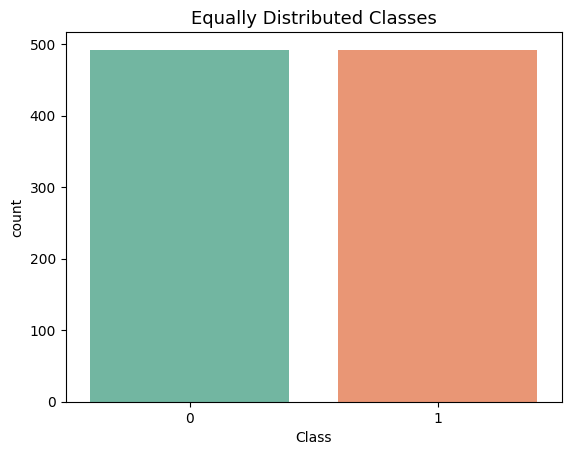

In [ ]:

# We present the new dataset of the equally possible transactions
print('Distribution of the Classes in the new dataset')

sns.countplot(data=df_new, x='Class', palette="Set2")
plt.title('Equally Distributed Classes', fontsize=13)
plt.show()


In [ ]:
# We show the ratio of the new dataframe
# Our data are equally likely as we can see below

print("The percentage of normal transactions is: ", (len(df_new[df_new['Class']==0])/len(df_new)))
print("The percentage of fraud transactions is: ", (len(df_new[df_new['Class']==1])/len(df_new)))
print("The total number of transactions in resampled data: ", len(df_new))

The percentage of normal transactions is:  0.5
The percentage of fraud transactions is:  0.5
The total number of transactions in resampled data:  984


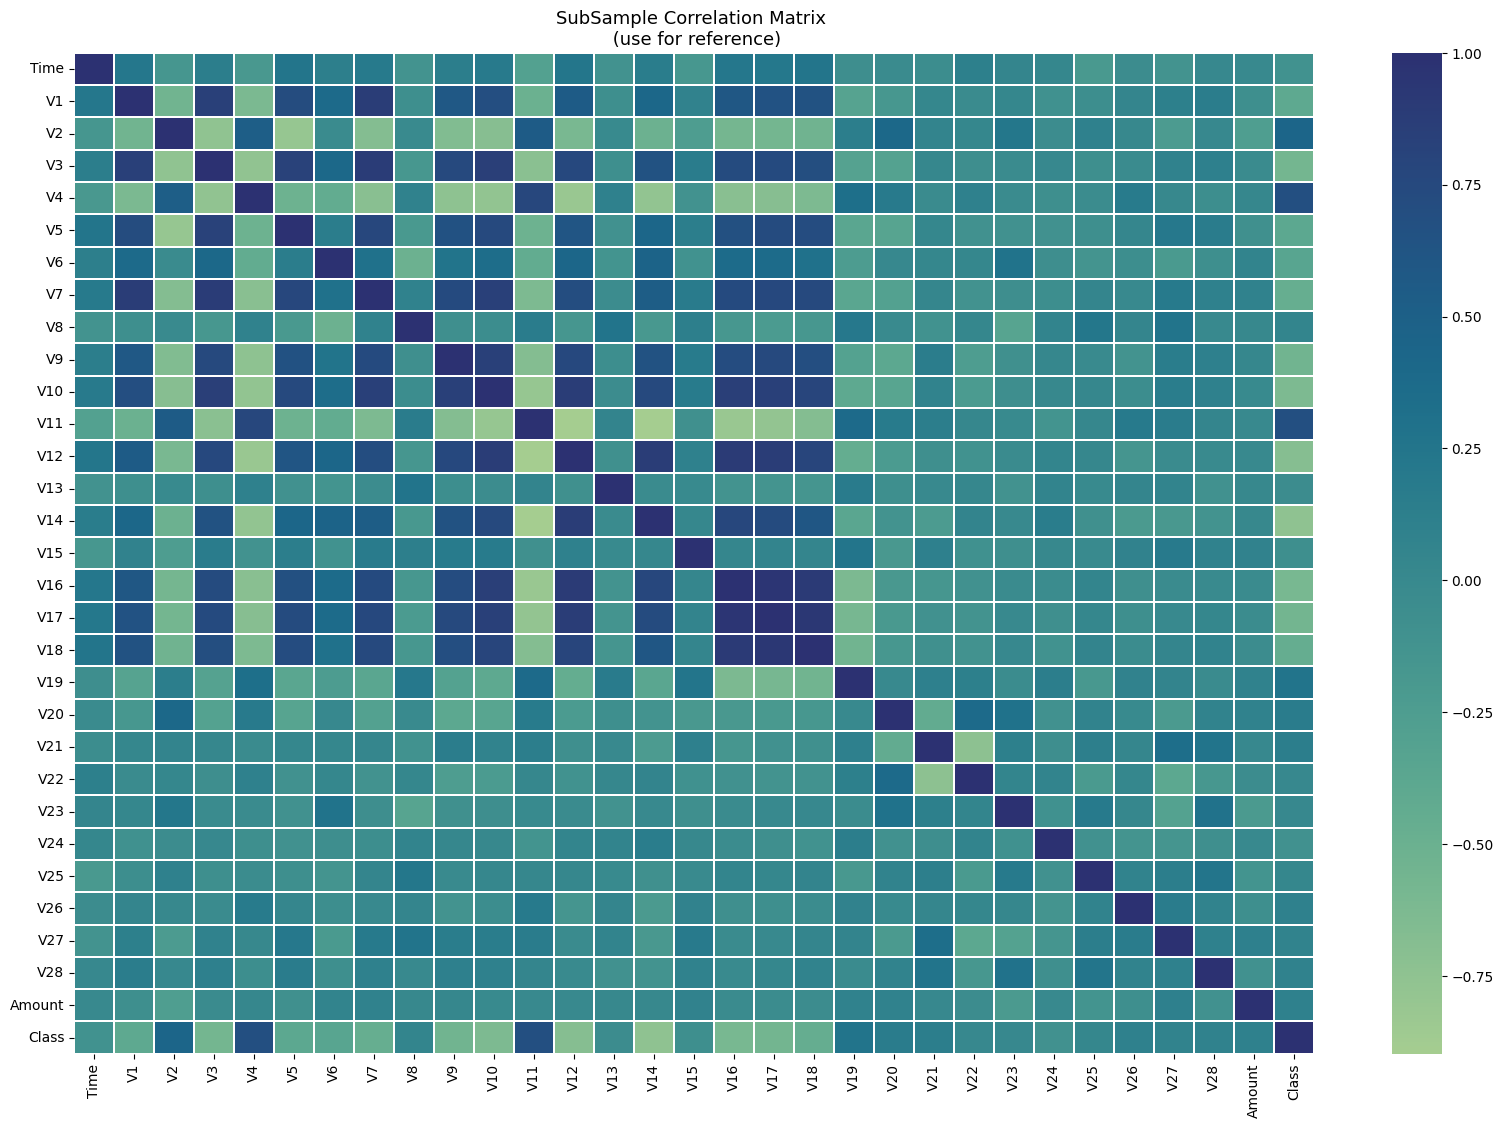

In [ ]:
# This is the heatmap that we will use as a reference in the project

corr1 = df_new.corr()
fig, ax = plt.subplots(figsize=(20,13))
sns.heatmap(corr1, cmap='crest', annot_kws={'size':20}, linewidths= 0.05)
ax.set_title('SubSample Correlation Matrix \n (use for reference)', fontsize=13)
plt.show()

Positive Correlation scatterplot 



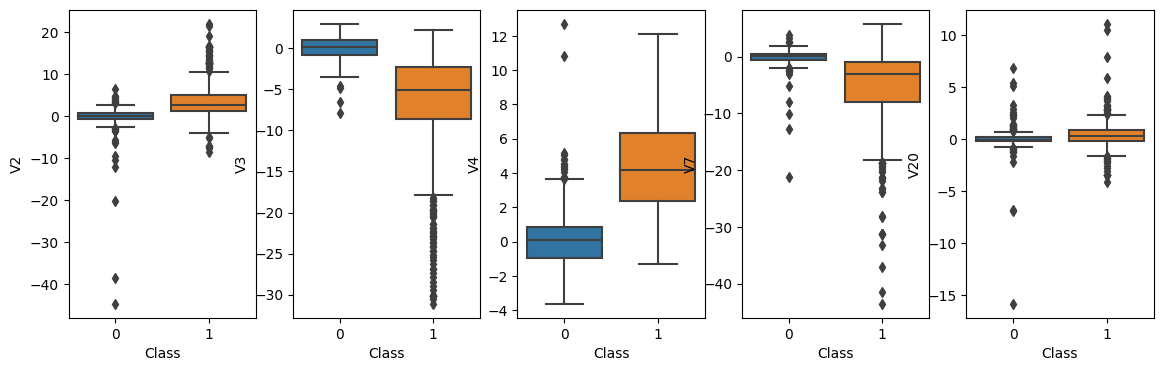

In [ ]:
# Find the positive correletaion which can be our outliers
# Positive correlation: The higher the feature value the probability increases that it will be a fraudulent transaction

f, axes = plt.subplots(ncols=5, figsize=(14,4))

sns.boxplot(x='Class' , y ='V2',  data = df_new, ax=axes[0])
sns.boxplot(x='Class' , y ='V3',  data = df_new, ax=axes[1])
sns.boxplot(x='Class' , y ='V4',  data = df_new, ax=axes[2])
sns.boxplot(x='Class' , y ='V7',  data = df_new, ax=axes[3])
sns.boxplot(x='Class' , y ='V20', data = df_new, ax=axes[4])
print('Positive Correlation scatterplot', '\n')
plt.show()

Positive negative scatterplot 



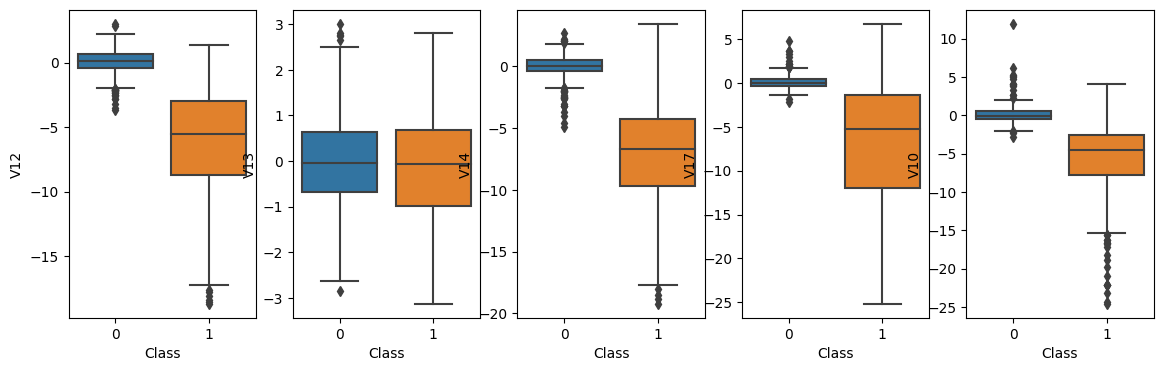

In [ ]:
# Find the positive correletaion which can be our outliers
# negative correlation: The higher the feature value the probability increases that it will be a fraudulent transaction

f, axes = plt.subplots(ncols=5, figsize=(14,4))

sns.boxplot(x='Class' , y ='V12',  data = df_new, ax=axes[0])
sns.boxplot(x='Class' , y ='V13',  data = df_new, ax=axes[1])
sns.boxplot(x='Class' , y ='V14',  data = df_new, ax=axes[2])
sns.boxplot(x='Class' , y ='V17',  data = df_new, ax=axes[3])
sns.boxplot(x='Class' , y ='V10', data = df_new, ax=axes[4])
print('Positive negative scatterplot', '\n')
plt.show()

In [ ]:
# We will remove of the extreme outliers from top two positive correlation
# Second is the V3

V3_fraud = df_new['V3'].loc[df_new['Class'] == 1 ].values

q25_V3 = np.percentile(V3_fraud , 25)
q75_V3 = np.percentile(V3_fraud , 75)

print('The 25th Quartile is :'  , q25_V3)
print('The 75th Quantile is : ' , q75_V3)

V3_iqr = q75_V3 - q25_V3

print('The IQR of V3 is :' , V3_iqr , '\n')
V3_off = 1.5 * V3_iqr
V3_lower = q25_V3 - V3_off
V3_upper = q75_V3 + V3_off

print('The V3 tha we will remove is :' , V3_off)
print('The min point is :' , V3_lower)
print('The max point is :' , V3_upper ,'\n')

outliers_V3 = [i for i in V3_fraud if i < V3_lower or i > V3_upper ]
df_new_V3 = df_new.drop(df_new[(df_new['V3'] > V3_upper) | (df_new['V3'] < V3_lower)].index)

print('The number of the outliers is : ', len(outliers_V3))
print('The number of transactions after the outliers removes is :' , len(df_new_V3))
print('The new dataset after we remove the outliers of V3 is :' , df_new_V3.shape)

The 25th Quartile is : -8.64348925575
The 75th Quantile is :  -2.2761847275
The IQR of V3 is : 6.367304528249999 

The V3 tha we will remove is : 9.550956792374999
The min point is : -18.194446048125
The max point is : 7.274772064874998 

The number of the outliers is :  53
The number of transactions after the outliers removes is : 931
The new dataset after we remove the outliers of V3 is : (931, 31)


Before and After we apply the IQR method and remove the outliers of V3 



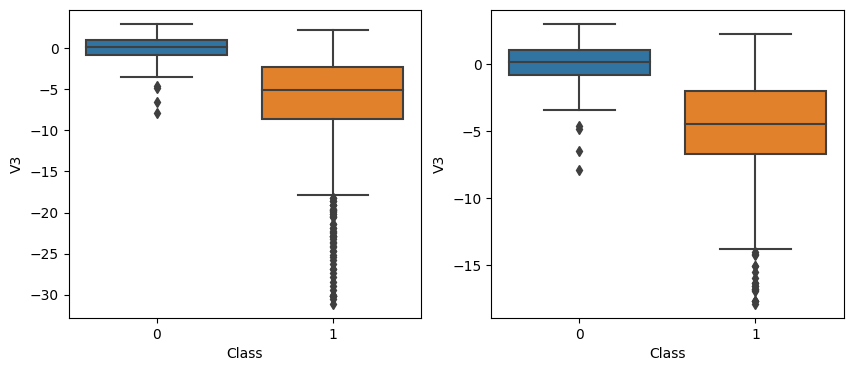

In [ ]:
 # we can compare our boxplots before and after we remove the outliers of V3.

f,(ax1, ax2) = plt.subplots(1, 2, figsize=(10,4))

sns.boxplot( x="Class", y="V3", data=df_new, ax=ax1 )
sns.boxplot( x="Class", y="V3", data=df_new_V3, ax=ax2 )

print('Before and After we apply the IQR method and remove the outliers of V3', '\n')

In [ ]:
# We will remove of the extreme outliers from top two positive correlation
# First is the V20

V20_fraud = df_new['V20'].loc[df_new['Class'] == 1 ].values

q25_V20 = np.percentile(V20_fraud , 25)
q75_V20 = np.percentile(V20_fraud , 75)

print('The 25th Quartile is :' , q25_V20)
print('The 75th Quantile is :' , q75_V20)

V20_iqr = q75_V20 - q25_V20

print('The IQR of V20 is :' , V20_iqr , '\n')

V20_off = 1.5 * V20_iqr
V20_lower = q25_V20 - V20_off
V20_upper = q75_V20 + V20_off

print('The V20 that we will remove is :' , V20_off)
print('The min point is :' , V20_lower)
print('The max point is :' , V20_upper , '\n')

outliers_V20 = [i for i in V20_fraud if i < V20_lower or i > V20_upper ]
df_new_V20 = df_new.drop(df_new[(df_new['V20'] > V20_upper) | (df_new['V20'] < V20_lower)].index)

print('The number of the outliers is : ', len(outliers_V20))
print('The number of transactions after the outliers removes is :' , len(df_new_V20))
print('The new dataset after we remove the outliers of v20 is :' , df_new_V20.shape)

The 25th Quartile is : -0.17176003374999999
The 75th Quantile is : 0.822444908
The IQR of V20 is : 0.9942049417500001 

The V20 that we will remove is : 1.491307412625
The min point is : -1.6630674463750001
The max point is : 2.3137523206250004 

The number of the outliers is :  41
The number of transactions after the outliers removes is : 931
The new dataset after we remove the outliers of v20 is : (931, 31)


Before and After we apply the IQR method and remove the outliers of V20 



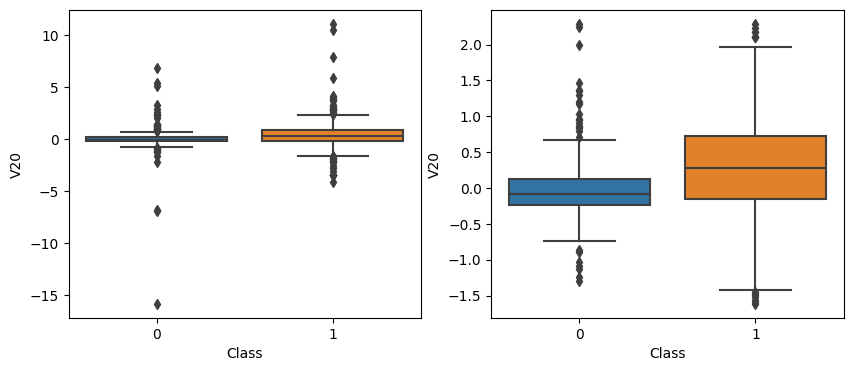

In [ ]:
# We can compare our boxplots before and after we remove the outliers of V20.

f,(ax1, ax2) = plt.subplots(1, 2, figsize=(10,4))

sns.boxplot( x="Class", y="V20", data=df_new, ax=ax1 )
sns.boxplot( x="Class", y="V20", data=df_new_V20, ax=ax2 )

print('Before and After we apply the IQR method and remove the outliers of V20', '\n')

In [ ]:
# We will remove of the extreme outliers from top two negative correlation
# First the V10

V10_fraud = df_new['V10'].loc[df_new['Class'] == 1 ].values

q25_V10 = np.percentile(V10_fraud , 25)
q75_V10 = np.percentile(V10_fraud , 75)

print('The 25th Quartile is :' , q25_V10)
print('The 75th Quantile is :' , q75_V10)

V10_iqr = q75_V10 - q25_V10

print('The IQR of V10 is :' , V10_iqr , '\n')

V10_off = 1.5* V10_iqr
V10_lower = q25_V10 - V10_off
V10_upper = q75_V10 + V10_off

print('The V10 tha we will remove is :' , V10_off)
print('The min point is :' , V10_lower)
print('The max point is :' , V10_upper , '\n')

outliers_V10 = [i for i in V10_fraud if i < V10_lower or i > V10_upper ]
df_new_V10 = df_new.drop(df_new[(df_new['V10'] > V10_upper) | (df_new['V10'] < V10_lower)].index)

print('The number of the outliers is : ', len(outliers_V10))
print('The number of transactions after the outliers removes is :' , len(df_new_V10))
print('The new dataset after we remove the outliers of V10 is :' ,df_new_V10.shape)

The 25th Quartile is : -7.75669822825
The 75th Quantile is : -2.6141839135
The IQR of V10 is : 5.1425143147500005 

The V10 tha we will remove is : 7.713771472125001
The min point is : -15.470469700375002
The max point is : 5.099587558625001 

The number of the outliers is :  19
The number of transactions after the outliers removes is : 961
The new dataset after we remove the outliers of V10 is : (961, 31)


Before and After we apply the IQR method and remove the outliers of V10 



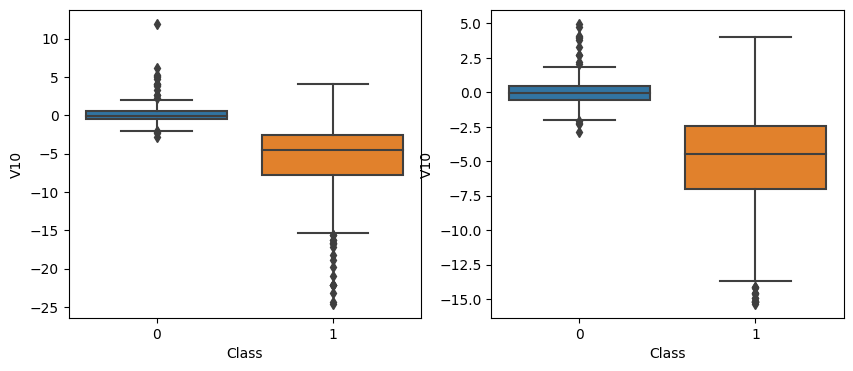

In [ ]:
# We can compare our boxplots before and after we remove the outliers of V10

f,(ax1, ax2) = plt.subplots(1, 2, figsize=(10,4))

sns.boxplot( x="Class", y="V10", data=df_new, ax = ax1 )
sns.boxplot( x="Class", y="V10", data=df_new_V10, ax = ax2 )

print('Before and After we apply the IQR method and remove the outliers of V10' , '\n')

In [ ]:
# We will remove of the extreme outliers from top two negative correlation
# First the V14

V14_fraud = df_new['V14'].loc[df_new['Class'] == 1 ].values

q25_V14 = np.percentile(V14_fraud , 25)
q75_V14 = np.percentile(V14_fraud , 75)

print('The 25th Quartile is :' , q25_V14)
print('The 75th Quantile is : ' , q75_V14)

V14_iqr = q75_V14 - q25_V14

print('The IQR of V14 is :' , V14_iqr, '\n')

V14_off = 1.5 * V14_iqr
V14_lower = q25_V14 - V14_off
V14_upper = q75_V14 + V14_off

print('The V14 tha we will remove is :' , V14_off)
print('The min point is :' , V14_lower)
print('The max point is :' , V14_upper,'\n')

outliers_V14 = [i for i in V14_fraud if i < V14_lower or i > V14_upper ]
df_new_V14 = df_new.drop(df_new[(df_new['V14'] > V14_upper) | (df_new['V14'] < V14_lower)].index)

print('The number of the outliers is : ', len(outliers_V14))
print('The number of transactions after the outliers removes is :' , len(df_new_V14))
print('The new dataset after we remove the outliers of V14 is :' ,df_new_V14.shape)

The 25th Quartile is : -9.69272296475
The 75th Quantile is :  -4.2828208495
The IQR of V14 is : 5.40990211525 

The V14 tha we will remove is : 8.114853172875002
The min point is : -17.807576137625002
The max point is : 3.8320323233750013 

The number of the outliers is :  4
The number of transactions after the outliers removes is : 980
The new dataset after we remove the outliers of V14 is : (980, 31)


Before and After we apply the IQR method and remove the outliers of V14 



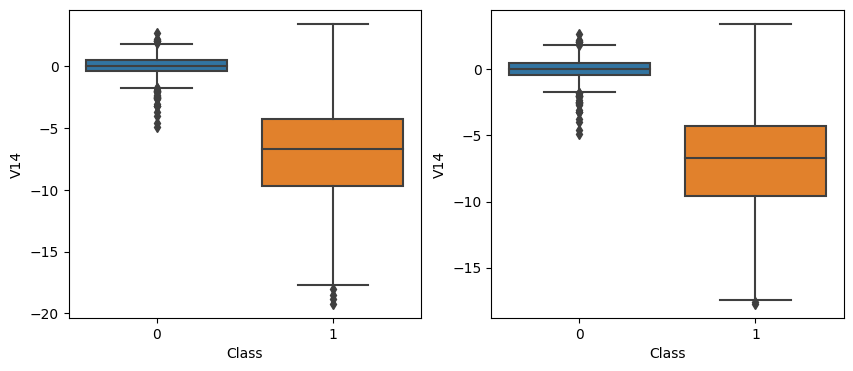

In [ ]:
# We can compare our boxplots before and after we remove the outliers of V14

f,(ax1, ax2) = plt.subplots(1, 2, figsize=(10,4))

sns.boxplot( x="Class", y="V14", data=df_new, ax=ax1)
sns.boxplot( x="Class", y="V14", data=df_new_V14, ax=ax2)

print('Before and After we apply the IQR method and remove the outliers of V14' , '\n' )

In [ ]:
df_new.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,91463.648374,-0.228722,-0.105783,0.016408,0.076089,0.217556,-0.068672,-0.102853,0.064394,-0.054929,...,-0.043013,-0.028082,-0.015307,-0.062502,0.008898,-0.000591,-0.039519,0.013125,-0.016899,74.904146
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [ ]:
X = df_new.drop(columns='Class', axis=1)
Y = df_new['Class']
# print x and y
print(X)
print(Y)

            Time        V1         V2        V3        V4        V5        V6  \
152704   97443.0  1.950266  -0.465956  0.135391  0.366908 -0.766682  0.085231   
268758  163366.0 -0.236906   0.013934  1.447793 -0.732557 -0.593043  0.254768   
144077   85848.0 -9.860478 -10.364674 -1.340676  1.340124  6.376697 -6.729542   
99396    67099.0  1.193551   0.170795  0.139400  0.460407 -0.061575 -0.115648   
214003  139489.0 -0.746279   1.307767 -0.932529 -1.301177  1.788325 -0.443439   
...          ...       ...        ...       ...       ...       ...       ...   
279863  169142.0 -1.927883   1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559   1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143   1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832   0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976   0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8 

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)
print(X.shape, X_train.shape, X_test.shape)

(984, 30) (787, 30) (197, 30)


**Checking the Skewness**

In [ ]:
# Listing the columns
cols = X_train.columns
cols

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

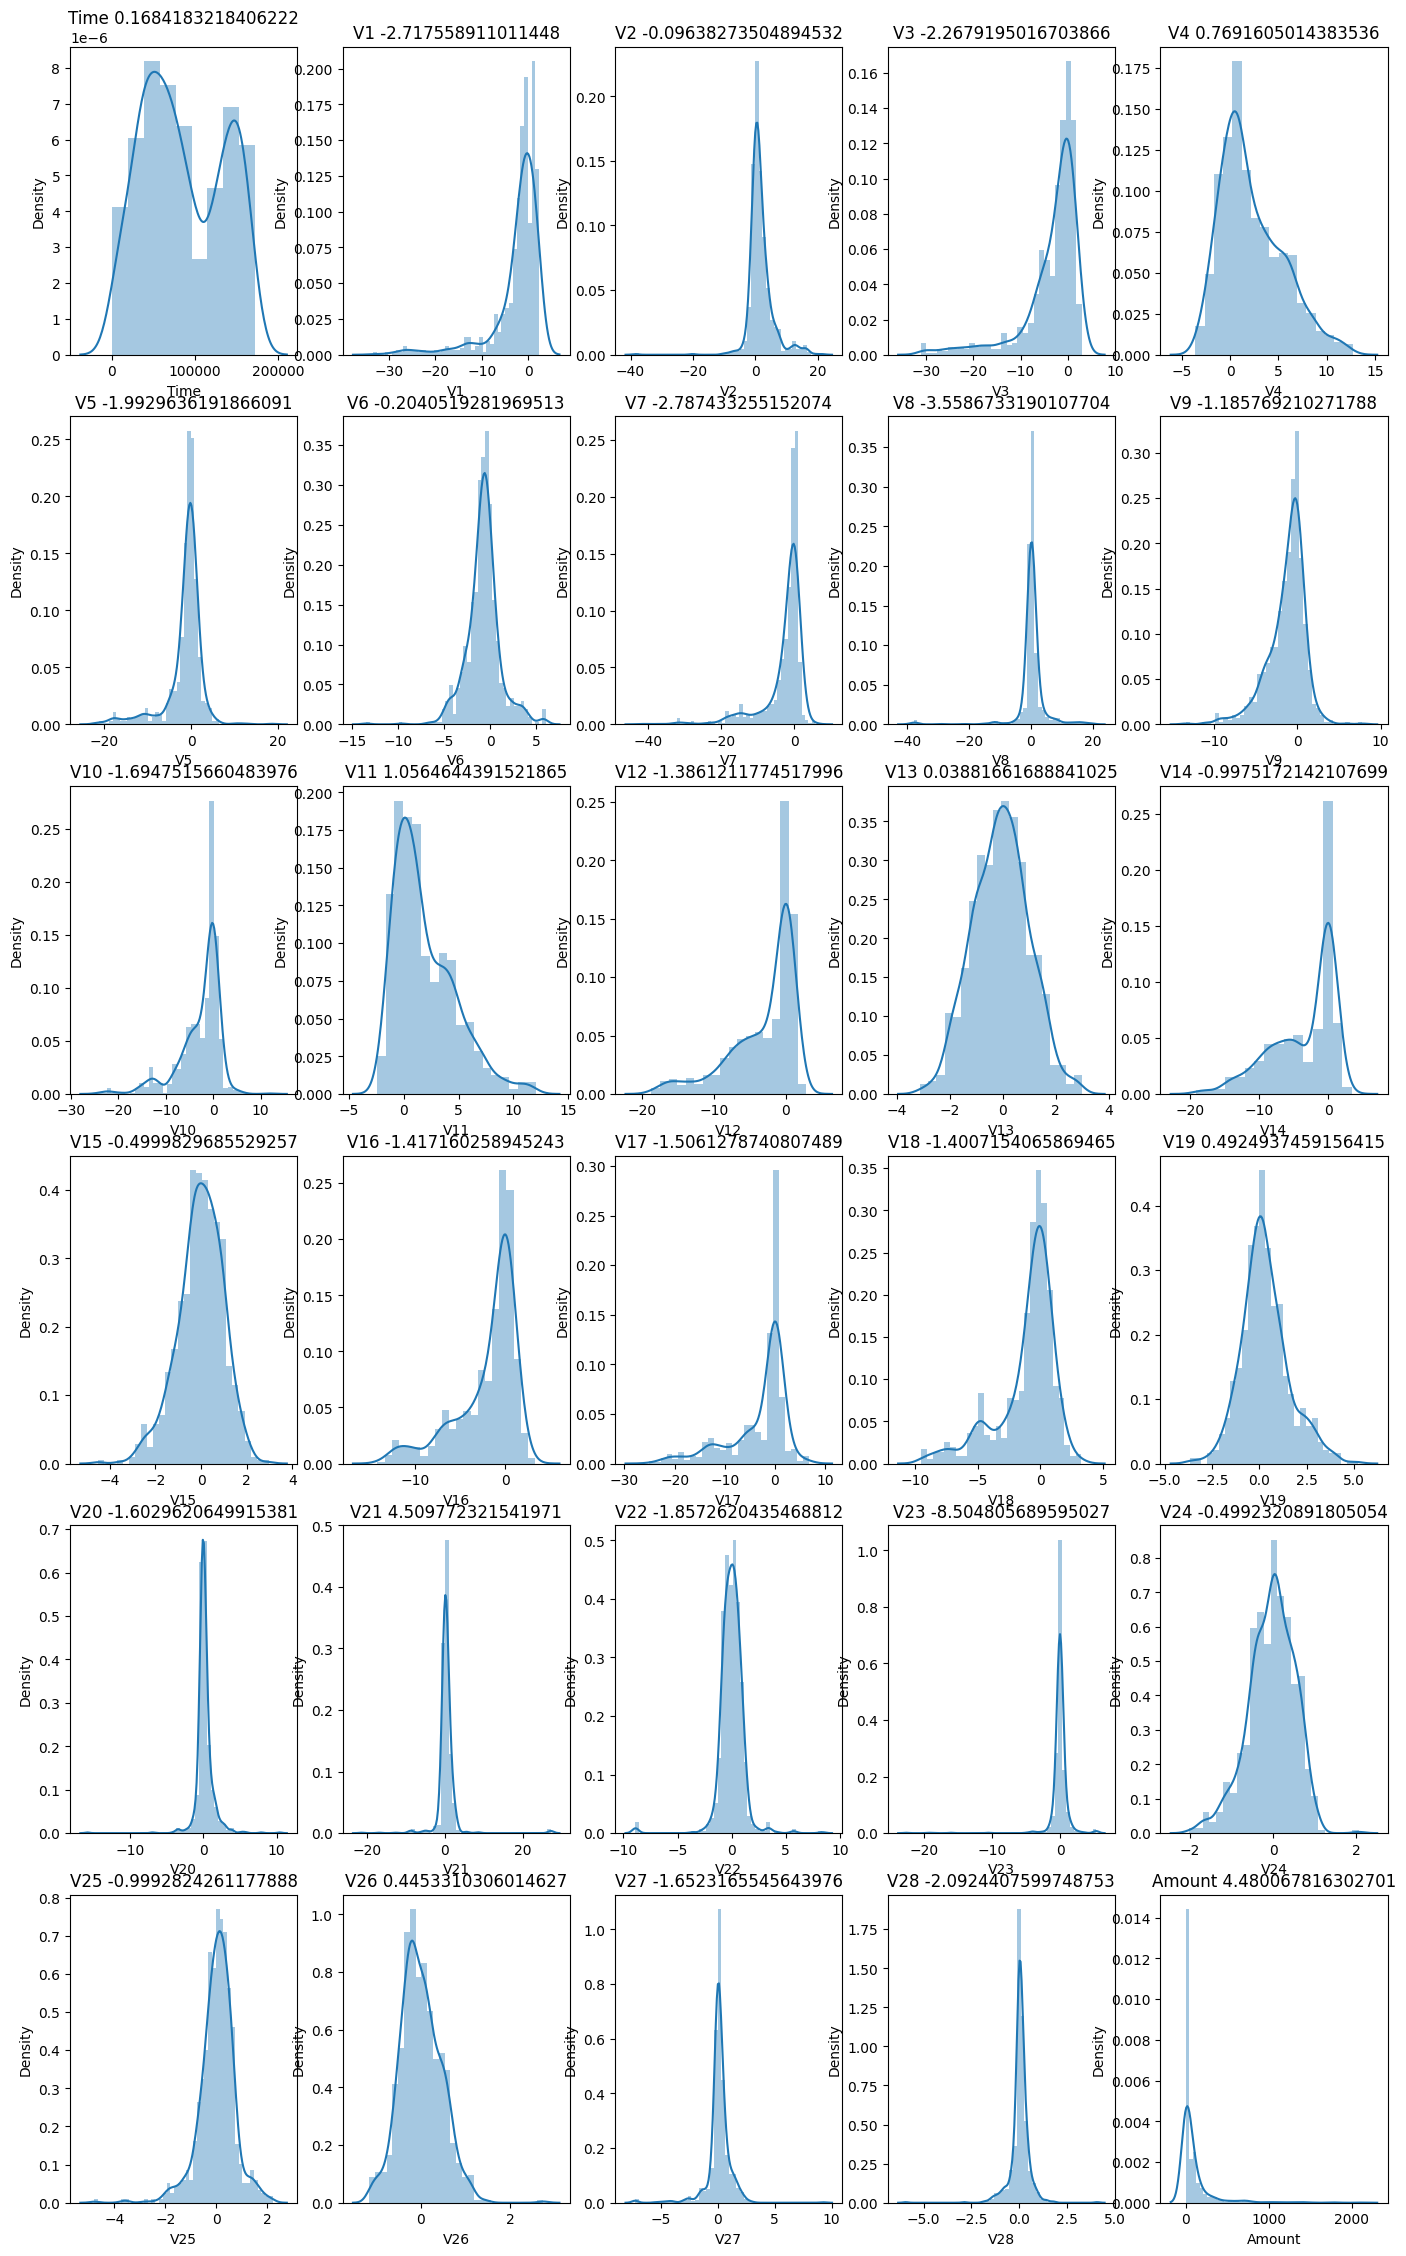

In [ ]:
# Plotting the distribution of the variables (skewness) of all the columns
k=0
plt.figure(figsize=(17,28))
for col in cols :
    k=k+1
    plt.subplot(6, 5,k)
    sns.distplot(X_train[col])
    plt.title(col+' '+str(X_train[col].skew()))

**Mitigate skweness with PowerTransformer**

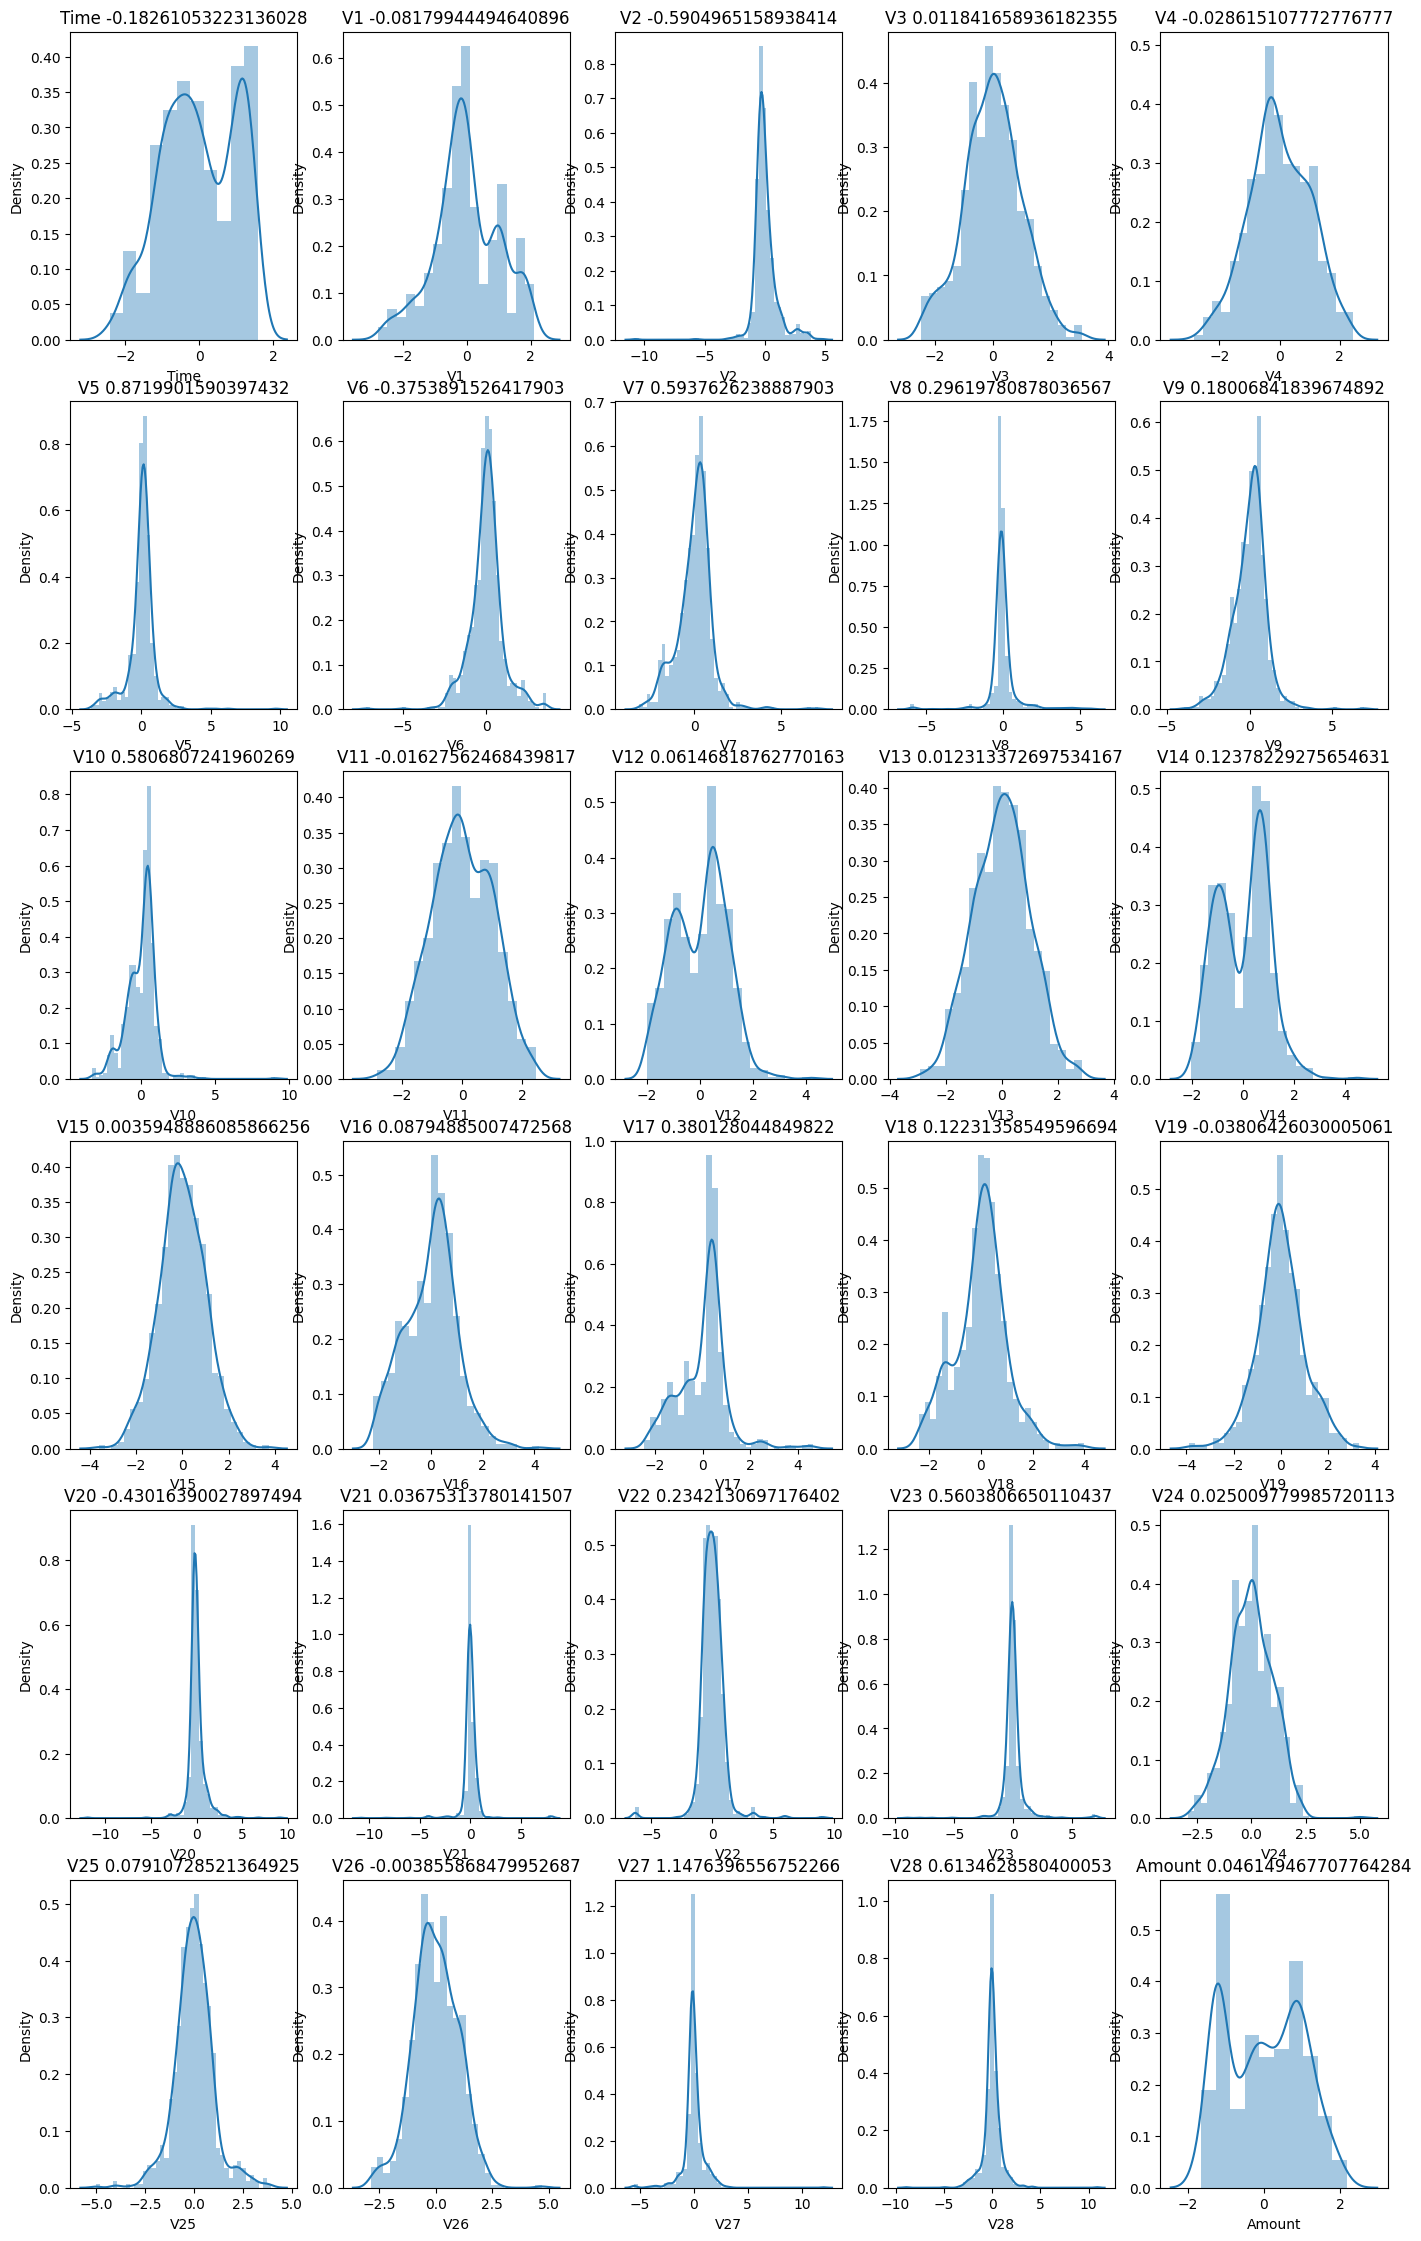

In [ ]:
# Importing PowerTransformer
from sklearn.preprocessing import PowerTransformer
# Instantiate the powertransformer
pt = PowerTransformer(method='yeo-johnson', standardize=True, copy=False)
# Fit and transform the PT on training data
X_train[cols] = pt.fit_transform(X_train)
# Transform the test set
X_test[cols] = pt.transform(X_test)
# Plotting the distribution of the variables (skewness) of all the columns
k=0
plt.figure(figsize=(17,28))
for col in cols :
    k=k+1
    plt.subplot(6, 5,k)
    sns.distplot(X_train[col])
    plt.title(col+' '+str(X_train[col].skew()))


Model Training

Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
model = LogisticRegression()
# training the Logistic Regression Model with Training Data
model.fit(X_train, Y_train)

LogisticRegression()

In [ ]:
# accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.9529860228716646


In [ ]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy score on Test Data : ', test_data_accuracy)

Accuracy score on Test Data :  0.9238578680203046


**Random forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators = 100)
random_forest.fit(X_train,Y_train.values.ravel())
y_pred= random_forest.predict(X_test)
random_forest.score(X_test,Y_test)

0.9289340101522843

In [ ]:
y_pred= random_forest.predict(X_train)
random_forest.score(X_train,Y_train)

1.0

In [ ]:
y_pred= random_forest.predict(X_test)
random_forest.score(X_test,Y_test)

0.9289340101522843

In [ ]:
X_test_prediction = random_forest.predict(X_train)
test_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print('Accuracy score on Train Data : ', training_data_accuracy)
X_test_prediction = random_forest.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy score on Test Data : ', test_data_accuracy)

Accuracy score on Train Data :  0.9529860228716646
Accuracy score on Test Data :  0.9289340101522843
